In [2]:
"""FC3 Genetic Alorithm from El Rosario to Consulado"""

import random
from typing import List, Tuple
from rutas import *

In [3]:

start_point = 'El Rosario'
end_point = 'San Lázaro'
size_pop = 5
num_generations = 20
elite_size = 1
mutation_rate = 0
# Genome

In [4]:

Genome = Tuple[List[int], int, List[str], List[Tuple[str, str]]]
# List of indexes, time, lineas, stages

def generate_genome(rutas: List[Ruta], start_point: str, end_point: str) -> Genome:
    current_point = start_point
    indexes = []
    stages = []
    while current_point != end_point:
        available_routes = [i for i, ruta in enumerate(rutas) if current_point == ruta.start]
        i = random.choice(available_routes)
        indexes.append(i)
        next_point = rutas[i].end
        stages.append((current_point, next_point))
        current_point = next_point
    time = sum(rutas[i].time for i in indexes)
    lineas = [rutas[i].linea for i in indexes]
    genome_str = f" El tiempo fue de: {time}, Rutas disponibles tomadas: {indexes}, Las estaciones fueron de: {stages}, en las lineas: {lineas},"
    return indexes, time, lineas, stages, genome_str

genome = generate_genome(rutas, start_point, end_point)
print(genome[4])

 El tiempo fue de: 80, Rutas disponibles tomadas: [31, 32, 69, 14, 15, 16, 71, 28, 77, 88, 87, 27, 70, 15, 28, 83, 28, 83, 16, 71, 28, 77, 22, 77, 22, 77, 88, 33, 88, 33, 22, 23, 52], Las estaciones fueron de: [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Indios Verdes'), ('Indios Verdes', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'La Raza'), ('La Raza', 'Guerrero'), ('Guerrero', 'La Raza'), ('La Raza', 'Consulado'), ('Consulado', 'Martín Carrera'), ('Martín Carrera', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'La Raza'), ('La Raza', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'La Raza'), ('La Raza', 'Consulado'), ('Consulado', 'La Raza'), ('La Raza', 'Consulado'), ('Consulado', 'La Raza'), ('La Raza', 'Guerrero'), ('Guerrero', 'La Raza'), ('La Raza', 'Consulado'), ('Consulado', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), 

In [5]:
# Population
Population = List[Genome]

def generate_population(rutas: List[Ruta], size_pop) -> Population:
    return [generate_genome(rutas, start_point, end_point) for _ in range(size_pop)]

population = generate_population(rutas, size_pop)
print('\n'.join(map(str, population)))

([31, 81, 26, 32, 87, 81, 26, 27, 28, 77, 22, 83, 82, 86, 31, 27, 70, 15, 16, 50, 105, 17, 9, 64, 9, 64, 18, 1, 40, 41, 96, 66, 3, 25, 80, 58, 57, 40, 66, 57, 40, 44, 45, 100, 80, 79, 52], 116, ['6', '5', '5', '6', '6', '5', '5', '5', '5', '4', '4', '5', '5', '6', '6', '5', '3', '3', '3', 'B', 'B', '3', '2', '2', '2', '2', '3', '1', '8', '8', '8', '2', '1', '4', '4', '1', '1', '8', '2', '1', '8', '9', '9', '9', '4', '4', 'B'], [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Politécnico'), ('Politécnico', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Politécnico'), ('Politécnico', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'La Raza'), ('La Raza', 'Consulado'), ('Consulado', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'La Raza'), ('La Raza', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'El Rosario'), ('El Rosar

In [6]:
def fitness(genome: Genome, rutas: List[Ruta]) -> float:
    time = genome[1]
    value = 1/time
    return value

In [7]:
def elitism(population: Population, rutas: List[Ruta], elite_size: int) -> Population:
    fitness_values = [(genome, fitness(genome, rutas)) for genome in population]
    sorted_by_fitness = sorted(fitness_values, key=lambda x: x[1], reverse=True)
    elite = [genome for genome in sorted_by_fitness[:elite_size]]
    return elite, fitness_values, sorted_by_fitness

elite, fitness_values, sorted_by_fitness = elitism(population, rutas, elite_size)

print("\nFitness values:")
for i, genome in enumerate(population):
    print(fitness_values[i][1])

print("\nFitness values afer sorting:")
for i, genome in enumerate(population):
    print(sorted_by_fitness[i][1])

print("\nBest genomes:")
for genome in elite:
    print(genome)


Fitness values:
0.008620689655172414
0.009523809523809525
0.01818181818181818
0.008771929824561403
0.002932551319648094

Fitness values afer sorting:
0.01818181818181818
0.009523809523809525
0.008771929824561403
0.008620689655172414
0.002932551319648094

Best genomes:
(([34, 35, 8, 72, 17, 63, 0, 55, 8, 9, 93, 51, 24, 58, 3, 4], 55, ['7', '7', '2', '3', '3', '2', '1', '1', '2', '2', '8', 'B', '4', '1', '1', '1'], [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Hidalgo'), ('Hidalgo', 'Guerrero'), ('Guerrero', 'Hidalgo'), ('Hidalgo', 'Tacubaya'), ('Tacubaya', 'Balderas'), ('Balderas', 'Tacubaya'), ('Tacubaya', 'Hidalgo'), ('Hidalgo', 'Bellas Artes'), ('Bellas Artes', 'Garibaldi'), ('Garibaldi', 'Morelos'), ('Morelos', 'Candelaria'), ('Candelaria', 'Pino Suárez'), ('Pino Suárez', 'Candelaria'), ('Candelaria', 'San Lázaro')], " El tiempo fue de: 55, Rutas disponibles tomadas: [34, 35, 8, 72, 17, 63, 0, 55, 8, 9, 93, 51, 24, 58, 3, 4], Las estaciones fueron de: [('El Rosar

No tengo idea como hacer el crossover, supongo que cuando haya un punto en comun, pero pueden tomar muchos muchos muchos caminos, mejor solo usamos elitismo

In [8]:

def mutate_genome(genome: Genome, rutas: List[Ruta], start_point: str, end_point: str) -> Genome:
    # Choose a random index to mutate
    index_to_mutate = random.randint(1, len(genome[0]) - 1)
    new_start_point = rutas[genome[0][index_to_mutate - 1]].end
    # Generate a new route
    new_route = generate_genome(rutas, new_start_point, end_point)

    # Create the new genome
    new_genome[0] = new_genome[0][:index_to_mutate] + new_route[0]
    new_genome[1] = sum(rutas[i].time for i in new_genome[0])
    new_genome[2] = [rutas[i].linea for i in new_genome[0]]
    new_genome[3] = [(rutas[i].start, rutas[i].end) for i in new_genome[0]]
    new_genome[4] = f" El tiempo fue de: {new_genome[1]}, Rutas disponibles tomadas: {new_genome[0]}, Las estaciones fueron de: {new_genome[3]}, en las lineas: {new_genome[2]},"

    return (new_genome)

print("\nOriginal genome:")
print(population[0])

print("\nMutated genome:")
print(mutate_genome(population[0], rutas, start_point, end_point))



Original genome:
([31, 81, 26, 32, 87, 81, 26, 27, 28, 77, 22, 83, 82, 86, 31, 27, 70, 15, 16, 50, 105, 17, 9, 64, 9, 64, 18, 1, 40, 41, 96, 66, 3, 25, 80, 58, 57, 40, 66, 57, 40, 44, 45, 100, 80, 79, 52], 116, ['6', '5', '5', '6', '6', '5', '5', '5', '5', '4', '4', '5', '5', '6', '6', '5', '3', '3', '3', 'B', 'B', '3', '2', '2', '2', '2', '3', '1', '8', '8', '8', '2', '1', '4', '4', '1', '1', '8', '2', '1', '8', '9', '9', '9', '4', '4', 'B'], [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Politécnico'), ('Politécnico', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Politécnico'), ('Politécnico', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'La Raza'), ('La Raza', 'Consulado'), ('Consulado', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'La Raza'), ('La Raza', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'El Ros

NameError: name 'new_genome' is not defined

In [ ]:
def mutate_best_genome(population: Population, rutas: List[Ruta], start_point: str, end_point: str) -> Genome:
    # Calculate fitness scores for the population
    fitness_scores = [fitness(genome, rutas) for genome in population]
    # Identify the genome with the best fitness score
    best_genome = population[fitness_scores.index(max(fitness_scores))]
    # Mutate the best genome
    mutated_best_genome = mutate_genome(best_genome, rutas, start_point, end_point)

    return mutated_best_genome

print("Original best genome: ")
print(elite[0])

print("\nMutated genome with best fitness score:")
print(mutate_best_genome(population, rutas, start_point, end_point))

Original best genome: 
(([34, 35, 42, 43, 44, 99, 44, 45, 85, 30, 85, 54, 109, 84, 29, 108], 42, ['7', '7', '9', '9', '9', '9', '9', '9', '5', '5', '5', 'B', 'B', '5', '5', 'B'], [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Centro Médico'), ('Centro Médico', 'Chabacano'), ('Chabacano', 'Jamaica'), ('Jamaica', 'Chabacano'), ('Chabacano', 'Jamaica'), ('Jamaica', 'Pantitlán'), ('Pantitlán', 'Oceanía'), ('Oceanía', 'Pantitlán'), ('Pantitlán', 'Oceanía'), ('Oceanía', 'Ciudad Azteca'), ('Ciudad Azteca', 'Oceanía'), ('Oceanía', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'San Lázaro')], " El tiempo fue de: 42, Rutas disponibles tomadas: [34, 35, 42, 43, 44, 99, 44, 45, 85, 30, 85, 54, 109, 84, 29, 108], Las estaciones fueron de: [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Centro Médico'), ('Centro Médico', 'Chabacano'), ('Chabacano', 'Jamaica'), ('Jamaica', 'Chabacano'), ('Chabacano', 'Jamaica'), ('Jamaica', 'Pantitlán'), ('Pantitlán', 'Oceanía

In [ ]:
mutation_rate = 0
def create_new_population(population: Population, rutas: List[Ruta], elite_size: int, mutation_rate: float) -> Population:
    # Select the elite individuals
    elite = elitism(population, rutas, elite_size)
    # Generate mutations of the elite individuals
    mutations = [mutate_genome(genome, rutas, start_point, end_point) for genome in elite if random.random() < mutation_rate]
    # Create the new population
    new_population = list(elite) + mutations
    return new_population

new_population = create_new_population(population, rutas, elite_size, mutation_rate)

print("\nNew population:")
print('\n'.join(map(str, new_population)))




New population:
[(([34, 35, 42, 43, 44, 99, 44, 45, 85, 30, 85, 54, 109, 84, 29, 108], 42, ['7', '7', '9', '9', '9', '9', '9', '9', '5', '5', '5', 'B', 'B', '5', '5', 'B'], [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Centro Médico'), ('Centro Médico', 'Chabacano'), ('Chabacano', 'Jamaica'), ('Jamaica', 'Chabacano'), ('Chabacano', 'Jamaica'), ('Jamaica', 'Pantitlán'), ('Pantitlán', 'Oceanía'), ('Oceanía', 'Pantitlán'), ('Pantitlán', 'Oceanía'), ('Oceanía', 'Ciudad Azteca'), ('Ciudad Azteca', 'Oceanía'), ('Oceanía', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'San Lázaro')], " El tiempo fue de: 42, Rutas disponibles tomadas: [34, 35, 42, 43, 44, 99, 44, 45, 85, 30, 85, 54, 109, 84, 29, 108], Las estaciones fueron de: [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Centro Médico'), ('Centro Médico', 'Chabacano'), ('Chabacano', 'Jamaica'), ('Jamaica', 'Chabacano'), ('Chabacano', 'Jamaica'), ('Jamaica', 'Pantitlán'), ('Pantitlán', 'Oceanía'), (

In [ ]:
def create_new_population(population: Population, rutas: List[Ruta], elite_size: int, mutation_rate: float) -> Population:
    # Select the elite individuals
    elite, fitness_values, sorted_by_fitness = elitism(population, rutas, elite_size)
    random_genomes = [generate_genome(rutas, start_point, end_point) for _ in range(size_pop - len(elite))]
    
    new_population = (elite) + random_genomes
    return new_population

new_population = create_new_population(population, rutas, elite_size, mutation_rate)

print("\nNew population:")
for genome in new_population:
    print(genome)

print("Size of the new population:", len(new_population))
print("Size of the original population:", len(population))


New population:
(([34, 35, 42, 43, 44, 99, 44, 45, 85, 30, 85, 54, 109, 84, 29, 108], 42, ['7', '7', '9', '9', '9', '9', '9', '9', '5', '5', '5', 'B', 'B', '5', '5', 'B'], [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Centro Médico'), ('Centro Médico', 'Chabacano'), ('Chabacano', 'Jamaica'), ('Jamaica', 'Chabacano'), ('Chabacano', 'Jamaica'), ('Jamaica', 'Pantitlán'), ('Pantitlán', 'Oceanía'), ('Oceanía', 'Pantitlán'), ('Pantitlán', 'Oceanía'), ('Oceanía', 'Ciudad Azteca'), ('Ciudad Azteca', 'Oceanía'), ('Oceanía', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'San Lázaro')], " El tiempo fue de: 42, Rutas disponibles tomadas: [34, 35, 42, 43, 44, 99, 44, 45, 85, 30, 85, 54, 109, 84, 29, 108], Las estaciones fueron de: [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Centro Médico'), ('Centro Médico', 'Chabacano'), ('Chabacano', 'Jamaica'), ('Jamaica', 'Chabacano'), ('Chabacano', 'Jamaica'), ('Jamaica', 'Pantitlán'), ('Pantitlán', 'Oceanía'), ('


Final population:
((((([31, 27, 28, 29, 108], 17, ['6', '5', '5', '5', 'B'], [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'La Raza'), ('La Raza', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'San Lázaro')], " El tiempo fue de: 17, Rutas disponibles tomadas: [31, 27, 28, 29, 108], Las estaciones fueron de: [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'La Raza'), ('La Raza', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'San Lázaro')], en las lineas: ['6', '5', '5', '5', 'B'],"), 0.058823529411764705), 17.0), 0.058823529411764705), 17.0)
([31, 86, 31, 81, 26, 86, 34, 89, 34, 89, 34, 89, 34, 35, 8, 72, 71, 28, 23, 78, 77, 22, 23, 52], 85, ['6', '6', '6', '5', '5', '6', '7', '7', '7', '7', '7', '7', '7', '7', '2', '3', '3', '5', '4', '4', '4', '4', '4', 'B'], [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'El Rosario'), ('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Politécnico'), 

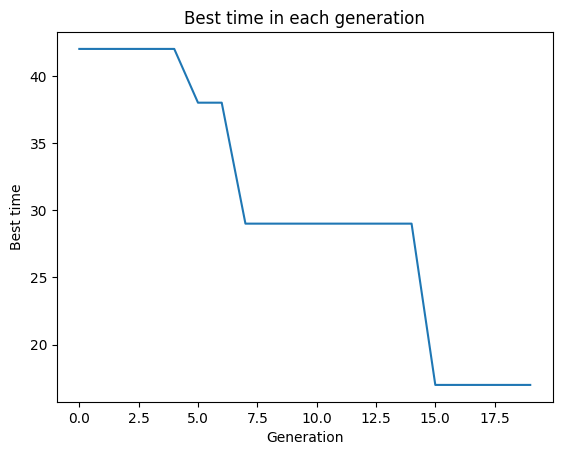

bests times:  [42.0, 42.0, 42.0, 42.0, 42.0, 38, 38.0, 29, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 17, 17.0, 17.0, 17.0, 17.0]


In [ ]:
import matplotlib.pyplot as plt

def genetic_algorithm(rutas: List[Ruta], population: Population, num_generations: int, elite_size: int, mutation_rate: float):
    best_times = []
    for _ in range(num_generations):
        # Create a new population
        population = create_new_population(population, rutas, elite_size, mutation_rate)
        
        # Mutate the population
        for i in range(len(population)):
            if random.random() < mutation_rate:
                population[i] = mutate_genome(population[i], rutas, start_point, end_point)
                
        # Find the best time in this generation and add it to the list
        best_genome = max(population, key=lambda genome: fitness(genome, rutas))
        time = best_genome[1]
        best_times.append(1/time if time < 1 else time)
                
    # Return the final population and the list of best times
    return population, best_times

# Run the genetic algorithm
final_population, best_times = genetic_algorithm(rutas, population, num_generations, elite_size, mutation_rate)

# Print the final population
print("\nFinal population:")
for genome in final_population:
    print(genome)

# Print the best genome
best_genome = max(final_population, key=lambda genome: fitness(genome, rutas))
print("\nBest genome:")
print(best_genome)

# Plot the best times
plt.plot(best_times)
plt.title('Best time in each generation')
plt.xlabel('Generation')
plt.ylabel('Best time')
plt.show()

print("bests times: ", best_times)